In [121]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Avogadro as N, Boltzmann as k_0

1. Initialization (position, velocity, potential, steps, dt, constants, mass)
2. Estimate/Calculate force and acceleration given potential
3. Update position and velocity (Velocity Verlet Algorithm)
4. Total Energy (KE + PE), position, momentum

In [122]:
#Initialize

#Initial position
pos = np.array([1, 5, 10])

#time-step
dt = 0.01 #pico-sec

#number-of-steps
steps = 1000

#temperatures
temp = 273

#Inert gas = Ar
mass = (39.95/N)*1e-3 #in kg
epsilon = 0.0104 #in eV
sigma = 3.40 #in Å

In [123]:
def LJ_Force(epsilon, sigma, x):
    return 4*epsilon*(12*((sigma)**12/(x)**13)-6*((sigma)**6/(x)**7))

In [124]:
a = np.zeros((pos.size, pos.size))

for i in range(0, pos.size-1):
    for j in range(i+1, pos.size):
        r_ij = pos[j]-pos[i]
        r_mag = abs(r_ij)
        f_scalar = LJ_Force(epsilon, sigma, r_mag)
        force = f_scalar * (r_ij/r_mag)
        a[i, j] = (force/mass)*1.602e-23 #in Å/picosec^2
        a[j, i] = -a[i, j]
np.sum(a, axis=0)

array([ 1.41572828, -0.44018728, -0.975541  ])

In [125]:

def get_acc(pos, epsilon, sigma, mass):
    a = np.zeros((pos.size, pos.size))

    for i in range(0, pos.size-1):
        for j in range(i+1, pos.size):
            r_ij = pos[j]-pos[i]
            r_mag = abs(r_ij)
            f_scalar = LJ_Force(epsilon, sigma, r_mag)
            force = f_scalar * (r_ij/r_mag)
            a[i, j] = (force/mass)*1.602e-23 #in Å/picosec^2
            a[j, i] = -a[i, j]
    return np.sum(a, axis=0)

In [126]:
# Boltzmann in J/K

def init_vel(pos, temp, mass):
    #in Å/picosec
    randvec = np.random.rand((pos.size))-0.5
    vel_x = randvec*np.sqrt((k_0*temp)/mass) * 1e-2
    return vel_x

In [127]:
#update position and velocity
pos_steps = np.zeros((steps, pos.size))
vel_steps = np.zeros((steps, pos.size))

vel = init_vel(pos, temp, mass)
acc = get_acc(pos, epsilon, sigma, mass)

vel_half = np.zeros((pos.size))
newpos = np.zeros((pos.size))
newacc = np.zeros((pos.size))
newvel = np.zeros((pos.size))

for i in range(steps):
    vel_half = vel + 0.5*acc*dt
    newpos = pos + vel_half*dt
    newacc = get_acc(newpos, epsilon, sigma, mass)
    newvel = vel_half + 0.5*newacc*dt
    pos_steps[i,:] = newpos
    vel_steps[i,:] = newvel
    vel = newvel
    pos = newpos
    acc = newacc

In [128]:
pos_steps

array([[ 1.00900667,  5.0110468 , 10.01121434],
       [ 1.01815572,  5.02204876, 10.02233115],
       [ 1.02744787,  5.03300514, 10.03335044],
       ...,
       [11.4101099 , 16.02684733, 19.76832309],
       [11.4295198 , 16.03247751, 19.77455083],
       [11.44907657, 16.03785063, 19.78088875]])

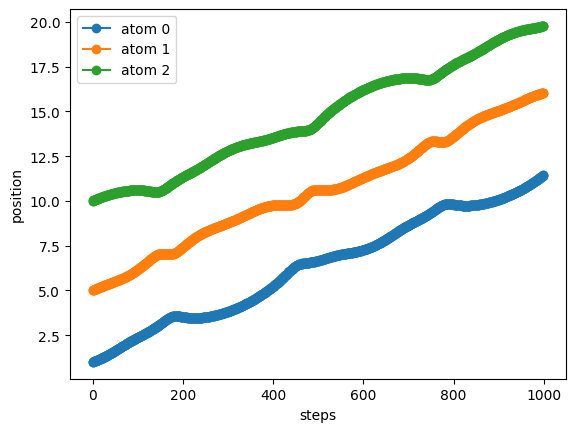

In [129]:
for i in range(pos_steps.shape[1]):
    plt.plot(pos_steps[:, i], marker='o', label='atom '+str(i))
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()
plt.show()

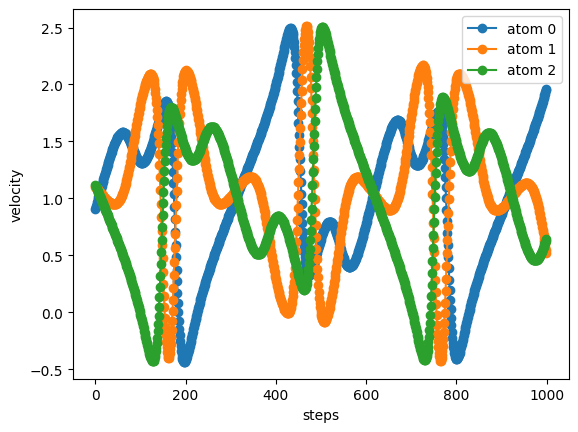

In [130]:
for i in range(vel_steps.shape[1]):
    plt.plot(vel_steps[:, i], marker='o', label='atom '+str(i))
plt.xlabel('steps')
plt.ylabel('velocity')
plt.legend()
plt.show()